<a href="https://colab.research.google.com/github/fomen2001/Hoston_house/blob/main/FOMENA_TSATSOP_VALDES_JOEL_HOUSE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Dans ce projet, nous implémentons et entraînons un modèle de prédiction des prix de l’immobilier en utilisant des données réelles

Chargement des donnees

In [1]:
#importation des bibliotheques
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from keras import models, layers
from keras.datasets import boston_housing

In [2]:
# 1. Chargement et préparation des données
(x_train, y_train), (x_test, y_test) = boston_housing.load_data()
print(f"Taille données d'entraînement : {x_train.shape}")
print(f"Taille données de test : {x_test.shape}")

57026/57026 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Taille données d'entraînement : (404, 13)
Taille données de test : (102, 13)


In [13]:
#affichons le dataset Boston Housing

# Créer un DataFrame avec les colonnes
columns = [
    'CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE',
    'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT'
]
train_df = pd.DataFrame(train_data, columns=columns)
train_df['PRICE'] = train_targets  # ajouter les prix comme colonne cible

# Afficher les premières lignes
print(train_df.head())


      CRIM    ZN  INDUS  CHAS    NOX     RM    AGE     DIS   RAD    TAX  \
0  1.23247   0.0   8.14   0.0  0.538  6.142   91.7  3.9769   4.0  307.0   
1  0.02177  82.5   2.03   0.0  0.415  7.610   15.7  6.2700   2.0  348.0   
2  4.89822   0.0  18.10   0.0  0.631  4.970  100.0  1.3325  24.0  666.0   
3  0.03961   0.0   5.19   0.0  0.515  6.037   34.5  5.9853   5.0  224.0   
4  3.69311   0.0  18.10   0.0  0.713  6.376   88.4  2.5671  24.0  666.0   

   PTRATIO       B  LSTAT  PRICE  
0     21.0  396.90  18.72   15.2  
1     14.7  395.38   3.11   42.3  
2     20.2  375.52   3.26   50.0  
3     20.2  396.90   8.01   21.1  
4     20.2  391.43  14.65   17.7  


In [9]:
# Vérification des valeurs manquantes
print(f"Valeurs manquantes dans x_train : {pd.DataFrame(x_train).isnull().sum().sum()}")
print(f"Valeurs manquantes dans x_test : {pd.DataFrame(x_test).isnull().sum().sum()}")


Valeurs manquantes dans x_train : 0
Valeurs manquantes dans x_test : 0


In [10]:
# Statistiques descriptives
print(pd.DataFrame(x_train).describe())


               0           1           2           3           4           5   \
count  404.000000  404.000000  404.000000  404.000000  404.000000  404.000000   
mean     3.745111   11.480198   11.104431    0.061881    0.557356    6.267082   
std      9.240734   23.767711    6.811308    0.241238    0.117293    0.709788   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.081437    0.000000    5.130000    0.000000    0.453000    5.874750   
50%      0.268880    0.000000    9.690000    0.000000    0.538000    6.198500   
75%      3.674808   12.500000   18.100000    0.000000    0.631000    6.609000   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.725000   

               6           7           8           9           10          11  \
count  404.000000  404.000000  404.000000  404.000000  404.000000  404.000000   
mean    69.010644    3.740271    9.440594  405.898515   18.475990  354.783168   
std     27.940665    2.0302

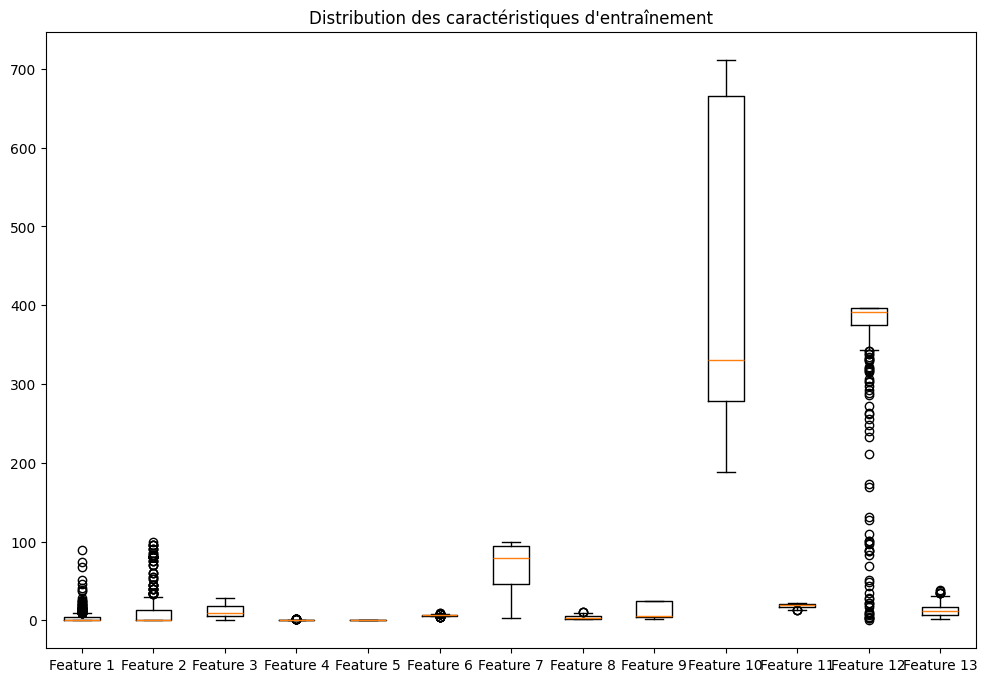

In [11]:
#visualisation de la distribution des differentes caracteristiques
plt.figure(figsize=(12, 8))
plt.boxplot(x_train)
plt.title("Distribution des caractéristiques d'entraînement")
plt.xticks(range(1, x_train.shape[1] + 1), labels=[f'Feature {i+1}' for i in range(x_train.shape[1])])
plt.show()


          0         1         2         3         4         5         6   \
0   1.000000 -0.192179  0.397419 -0.050828  0.405765 -0.217597  0.344410   
1  -0.192179  1.000000 -0.533823 -0.041981 -0.521713  0.338683 -0.578728   
2   0.397419 -0.533823  1.000000  0.052839  0.774200 -0.409924  0.656350   
3  -0.050828 -0.041981  0.052839  1.000000  0.079803  0.040431  0.080488   
4   0.405765 -0.521713  0.774200  0.079803  1.000000 -0.335866  0.729338   
5  -0.217597  0.338683 -0.409924  0.040431 -0.335866  1.000000 -0.240875   
6   0.344410 -0.578728  0.656350  0.080488  0.729338 -0.240875  1.000000   
7  -0.378590  0.650787 -0.725155 -0.083101 -0.777062  0.233970 -0.766670   
8   0.609689 -0.311091  0.599226 -0.024851  0.616535 -0.243990  0.462188   
9   0.575652 -0.303522  0.701362 -0.051343  0.673471 -0.307904  0.512746   
10  0.273447 -0.403139  0.379284 -0.122008  0.188160 -0.367256  0.282193   
11 -0.390613  0.176006 -0.372885  0.037832 -0.409479  0.145525 -0.278403   
12  0.434384

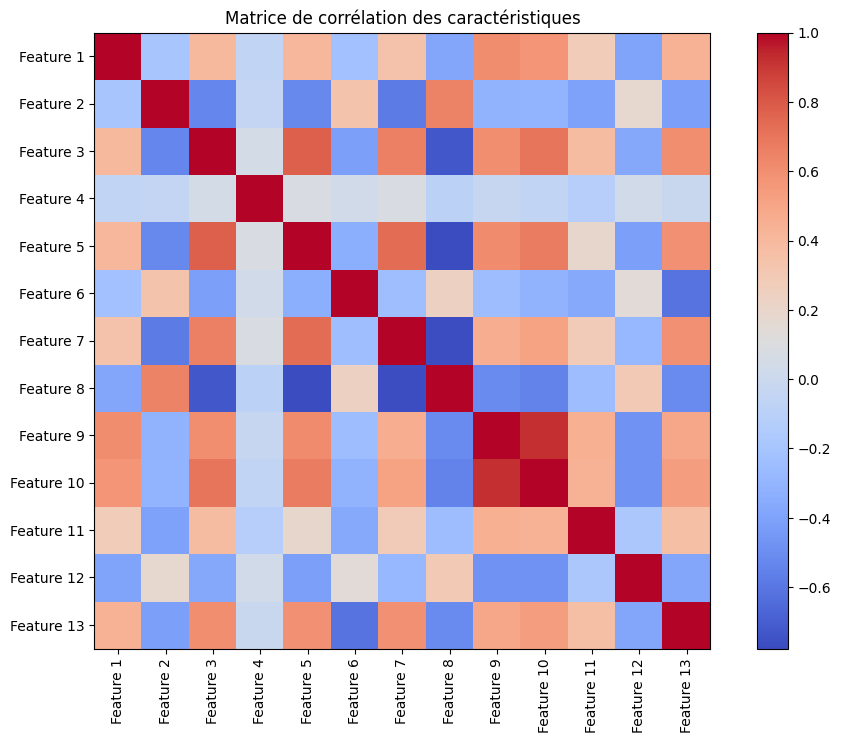

In [12]:
# Calcul de la matrice de corrélation
correlation_matrix = pd.DataFrame(x_train).corr()
print(correlation_matrix)

# Visualisation de la matrice de corrélation
plt.figure(figsize=(12, 8))
plt.imshow(correlation_matrix, cmap='coolwarm', interpolation='none')
plt.colorbar()
plt.title("Matrice de corrélation des caractéristiques")
plt.xticks(range(x_train.shape[1]), [f'Feature {i+1}' for i in range(x_train.shape[1])], rotation=90)
plt.yticks(range(x_train.shape[1]), [f'Feature {i+1}' for i in range(x_train.shape[1])])
plt.show()


In [14]:
# Normalisation des données
mean = x_train.mean(axis=0)
std = x_train.std(axis=0)
x_train_norm = (x_train - mean) / std
x_test_norm = (x_test - mean) / std

In [15]:
# Vérification de la normalisation
print(f"Moyenne après normalisation : {x_train_norm.mean(axis=0)}")
print(f"Écart-type après normalisation : {x_train_norm.std(axis=0)}")


Moyenne après normalisation : [-1.01541438e-16  1.09923072e-17  1.74337992e-15 -1.26686340e-16
 -5.25377321e-15  6.41414864e-15  2.98441140e-16  4.94653823e-16
  1.12671149e-17 -1.98136337e-16  2.36686358e-14  5.95679996e-15
  6.13920356e-16]
Écart-type après normalisation : [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


2- Definition de l'architecture du modele

In [27]:
 #Définition de l'architecture du modèle
def build_complex_model():
    model = models.Sequential()
    model.add(layers.Dense(128, activation='relu', input_shape=(x_train.shape[1],)))
    model.add(layers.Dense(128, activation='relu'))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(1))  # Prédiction d'une valeur continue
    model.compile(optimizer='adam', loss='mse', metrics=['mae'])
    return model


In [28]:
# 3. Entraînement — Première approche (100 époques)
model_100 = build_model()
model_100.fit(x_train_norm, y_train, epochs=100, batch_size=16, verbose=0)
loss_100, mae_100 = model_100.evaluate(x_test_norm, y_test)
print(f"\nÉvaluation après 100 époques :")
print(f"Perte (MSE) sur test : {loss_100:.4f}")
print(f"Erreur moyenne absolue (MAE) sur test : {mae_100:.4f}")

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 12.2660 - mae: 2.3832

Évaluation après 100 époques :
Perte (MSE) sur test : 16.6939
Erreur moyenne absolue (MAE) sur test : 2.5803


In [30]:
# 4. Entraînement — Deuxième approche (500 époques avec historique)
model_500 = build_model()
history = model_500.fit(x_train_norm, y_train, epochs=500, batch_size=16, validation_split=0.2, verbose=0)


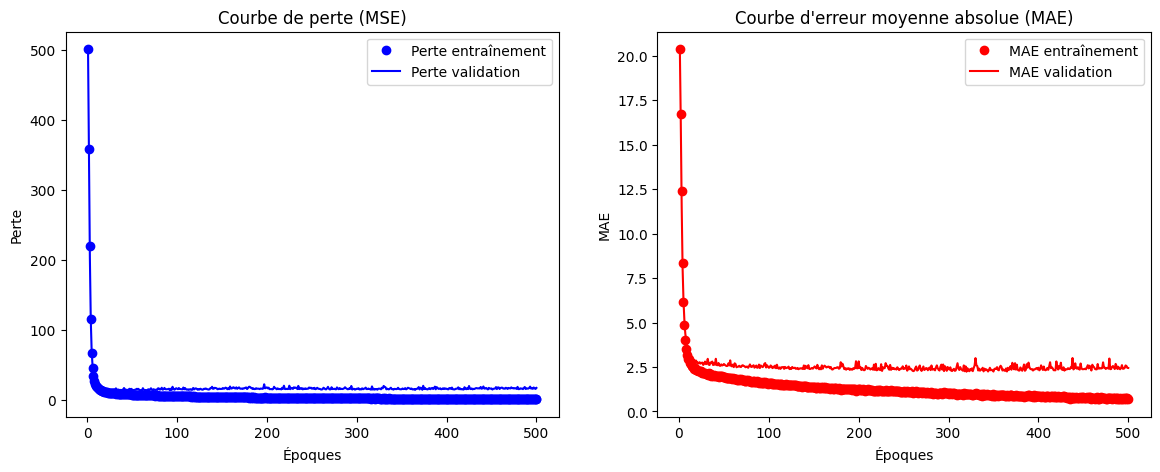

In [31]:
# 5. Visualisation des courbes de perte et MAE
loss = history.history['loss']
val_loss = history.history['val_loss']
mae = history.history['mae']
val_mae = history.history['val_mae']

epochs = range(1, len(loss) + 1)

plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.plot(epochs, loss, 'bo', label='Perte entraînement')
plt.plot(epochs, val_loss, 'b', label='Perte validation')
plt.title("Courbe de perte (MSE)")
plt.xlabel("Époques")
plt.ylabel("Perte")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs, mae, 'ro', label='MAE entraînement')
plt.plot(epochs, val_mae, 'r', label='MAE validation')
plt.title("Courbe d'erreur moyenne absolue (MAE)")
plt.xlabel("Époques")
plt.ylabel("MAE")
plt.legend()

plt.show()

In [32]:
# 6. Évaluation finale sur le test
loss_test, mae_test = model_500.evaluate(x_test_norm, y_test)
print(f"\nÉvaluation finale (500 époques) sur test :")
print(f"Perte (MSE) : {loss_test:.4f}")
print(f"Erreur moyenne absolue (MAE) : {mae_test:.4f}")

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 16.2482 - mae: 2.5646 

Évaluation finale (500 époques) sur test :
Perte (MSE) : 16.9787
Erreur moyenne absolue (MAE) : 2.6918


In [33]:
# 7. Prédictions sur le jeu de test
predictions = model_500.predict(x_test_norm).flatten()
comparison_df = pd.DataFrame({
    'Prix réel': y_test,
    'Prix prédit': predictions,
    'Erreur absolue': np.abs(y_test - predictions)
})
print("\nComparaison entre prix réels et prédits :")
print(comparison_df.head())

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step

Comparaison entre prix réels et prédits :
   Prix réel  Prix prédit  Erreur absolue
0        7.2     8.792632        1.592632
1       18.8    18.089989        0.710011
2       19.0    20.538153        1.538153
3       27.0    28.409231        1.409231
4       22.2    24.036282        1.836282


In [34]:
print(comparison_df.tail())

     Prix réel  Prix prédit  Erreur absolue
97        21.9    27.604004        5.704004
98        24.1    24.936916        0.836916
99        50.0    38.772938       11.227062
100       26.7    28.961250        2.261250
101       25.0    21.409258        3.590742
